# Group Timescales (NKI 1400, HY, CompCor, BNA)

In [1]:
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Load the subject list.

In [3]:
subject_list = np.genfromtxt('/home/despoB/dlurie/Projects/timescale_hierarchy/data/meta/subject_lists/NKI-healthy_young.txt', dtype="U")

In [4]:
def get_timescale_data(fpt, subject_list):
    ts_store = []
    for sub_id in subject_list:
        ts_data = np.loadtxt(glob(fpt.format(sub_id))[0])
        ts_store.append(ts_data)
    ts_store = np.array(ts_store)
    
    return ts_store 

## 10 TR decay

In [5]:
decay10_store = get_timescale_data('/home/despoB/dlurie/Projects/timescale_hierarchy/data/nki_rs/derivatives/custom/sub-{0}/func/sub-{0}_ses-*_task-rest_acq-1400_bold_space-T1w_atlas-BNA_variant-CompCor_decay10.tsv', subject_list)

In [6]:
decay10_store_filt = decay10_store.copy()

Exclude (set as NaN) decay estimates of zero or those greater than the number of seceonds needed for a signal to go 90° out of phase (zero autocorrelation) at the lowest possible frequency given our temporal filter.

In [7]:
decay10_store_filt[decay10_store_filt > 31.25] = np.nan

In [8]:
decay10_store_filt[decay10_store_filt == 0] = np.nan

In [9]:
np.sum(np.isnan(decay10_store_filt))

25

In [10]:
decay10_med = np.nanmedian(decay10_store_filt, axis=0)

In [11]:
decay10_std = np.nanstd(decay10_store_filt, axis=0)

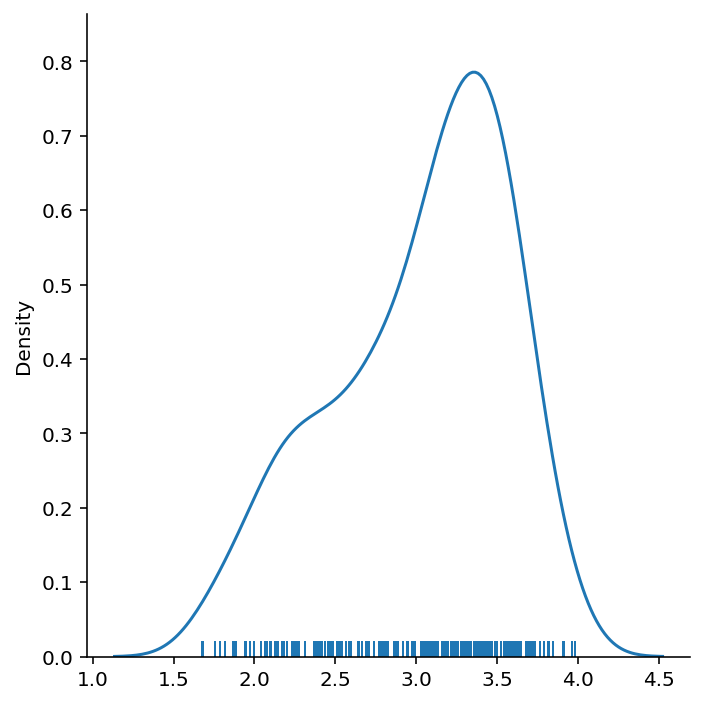

In [12]:
sns.displot(decay10_med, kind='kde', rug=True)

## 20 TR decay

In [13]:
decay20_store = get_timescale_data('/home/despoB/dlurie/Projects/timescale_hierarchy/data/nki_rs/derivatives/custom/sub-{0}/func/sub-{0}_ses-*_task-rest_acq-1400_bold_space-T1w_atlas-BNA_variant-CompCor_decay20.tsv', subject_list)

In [14]:
decay20_store_filt = decay20_store.copy()

In [15]:
decay20_store_filt[decay20_store_filt > 31.25] = np.nan

In [16]:
decay20_store_filt[decay20_store_filt == 0] = np.nan

In [17]:
np.sum(np.isnan(decay20_store_filt))

0

In [18]:
decay20_med = np.nanmedian(decay20_store_filt, axis=0)

In [19]:
decay20_std = np.nanstd(decay20_store_filt, axis=0)

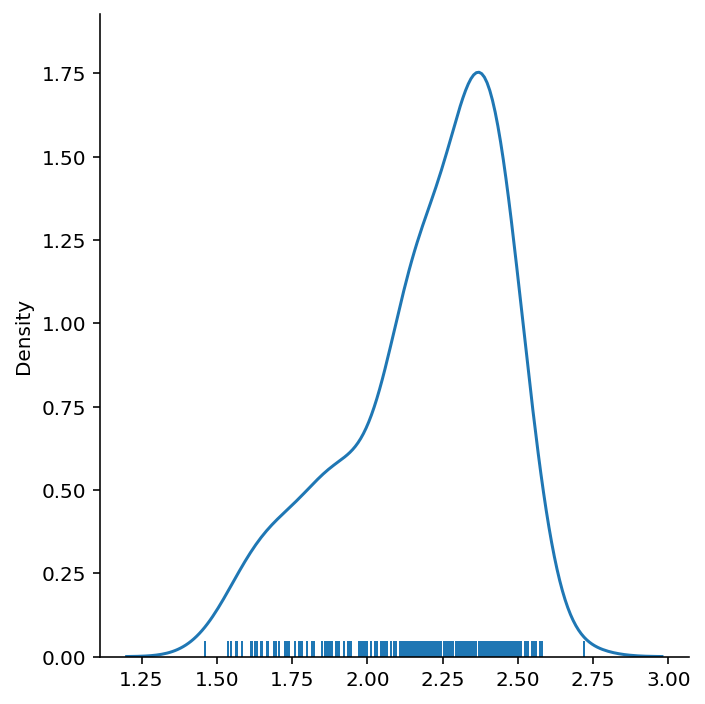

In [20]:
sns.displot(decay20_med, kind='kde', rug=True)

## Lag-1 Autocorrelation

In [21]:
lag1_store = get_timescale_data('/home/despoB/dlurie/Projects/timescale_hierarchy/data/nki_rs/derivatives/custom/sub-{0}/func/sub-{0}_ses-*_task-rest_acq-1400_bold_space-T1w_atlas-BNA_variant-CompCor_lag1.tsv', subject_list)

In [22]:
lag1_med = np.nanmedian(lag1_store, axis=0)

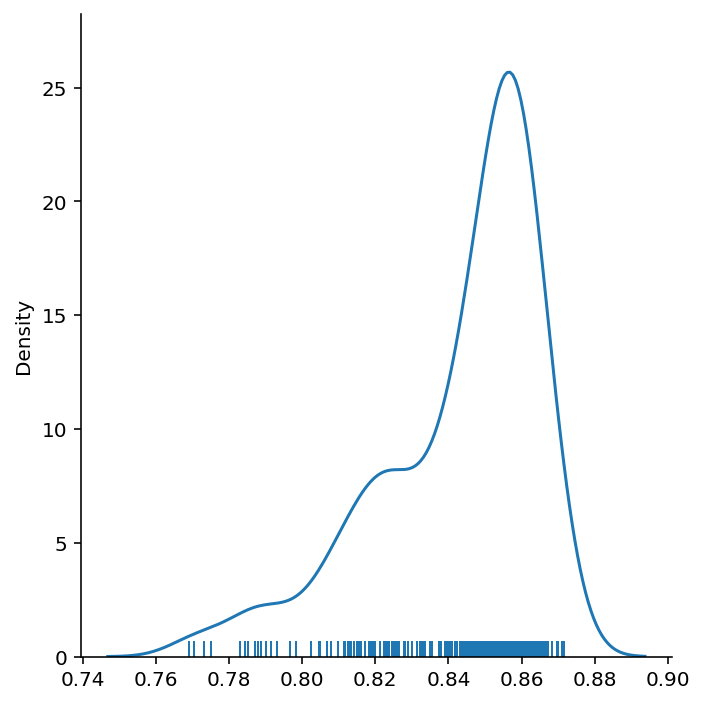

In [23]:
sns.displot(lag1_med, kind='kde', rug=True)

In [24]:
lag1_z_store = stats.zscore(lag1_store, axis=1)

In [25]:
lag1_z_med = np.nanmedian(lag1_z_store, axis=0)

r=0.9927914654206236, p=7.990886773634072e-227


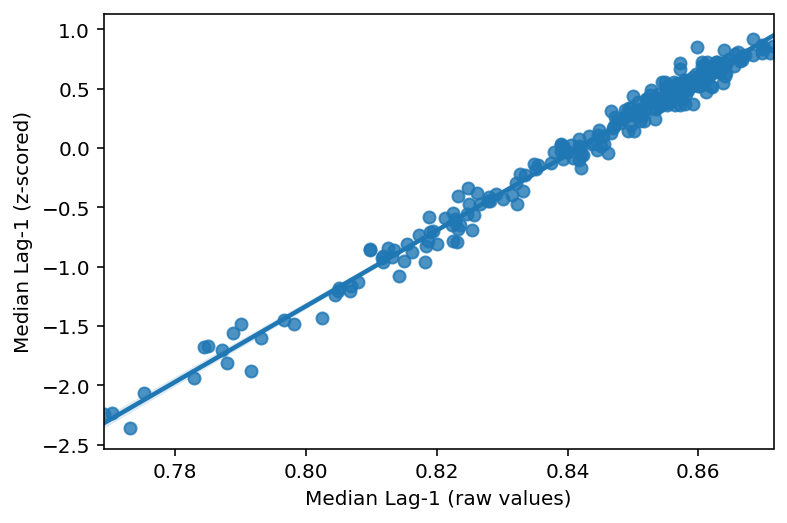

In [26]:
sns.regplot(x=lag1_med, y=lag1_z_med)
plt.xlabel('Median Lag-1 (raw values)')
plt.ylabel('Median Lag-1 (z-scored)')
r, p = stats.pearsonr(lag1_med, lag1_z_med)
print(f'r={r}, p={p}')

In [27]:
lag1_std = np.std(lag1_store, axis=0)

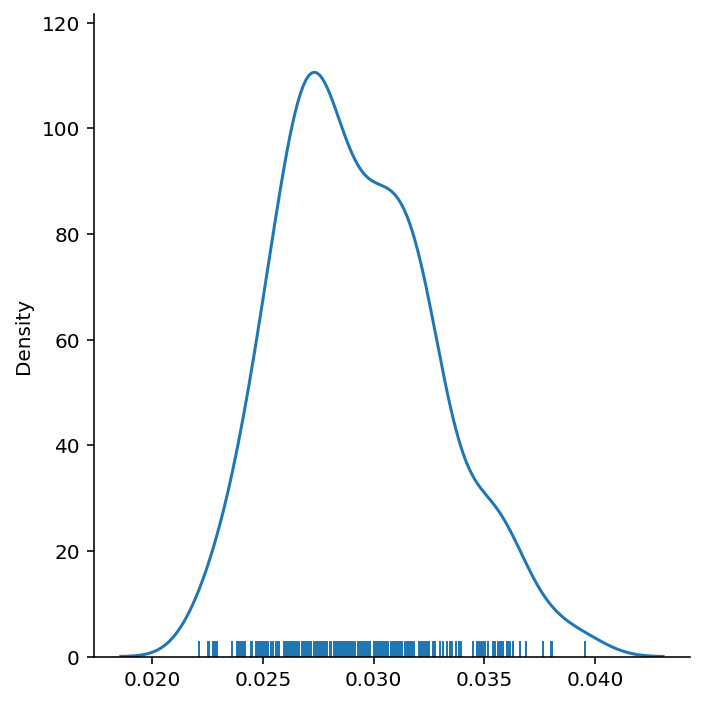

In [28]:
sns.displot(lag1_std, kind='kde', rug=True)

In [29]:
lag1_z_std = np.std(lag1_z_store, axis=0)

r=0.45442178234501585, p=6.145871592611365e-14


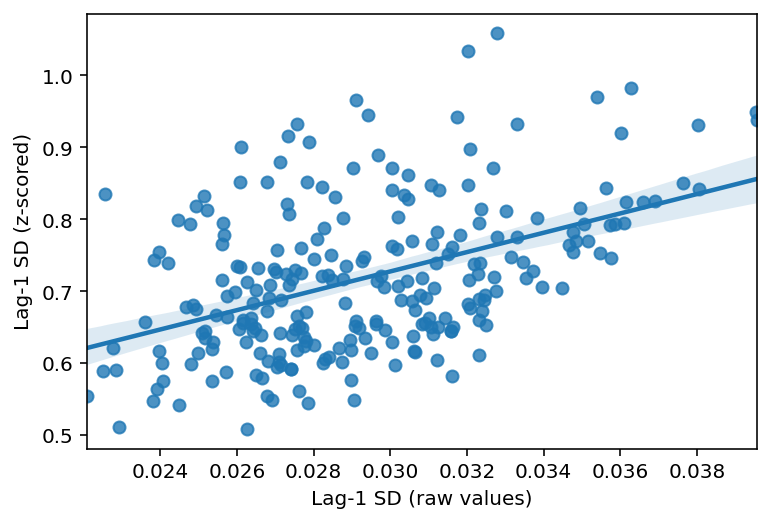

In [30]:
sns.regplot(x=lag1_std, y=lag1_z_std)
plt.xlabel('Lag-1 SD (raw values)')
plt.ylabel('Lag-1 SD (z-scored)')
r, p = stats.pearsonr(lag1_std, lag1_z_std)
print(f'r={r}, p={p}')

## Compare and save timescales

In [31]:
ts_df = pd.DataFrame([decay10_med, decay20_med, lag1_med, decay10_std, decay20_std, lag1_std, lag1_z_std, lag1_z_med])

In [32]:
ts_df = ts_df.T

In [33]:
ts_df.columns = ['decay10_median', 'decay20_median', 'lag1_median', 'decay10_std', 'decay20_std', 'lag1_std', 'lag1_z_std', 'lag1_z_med']

Text(0.5, 1.02, 'Correlation Between Timescale Measures')

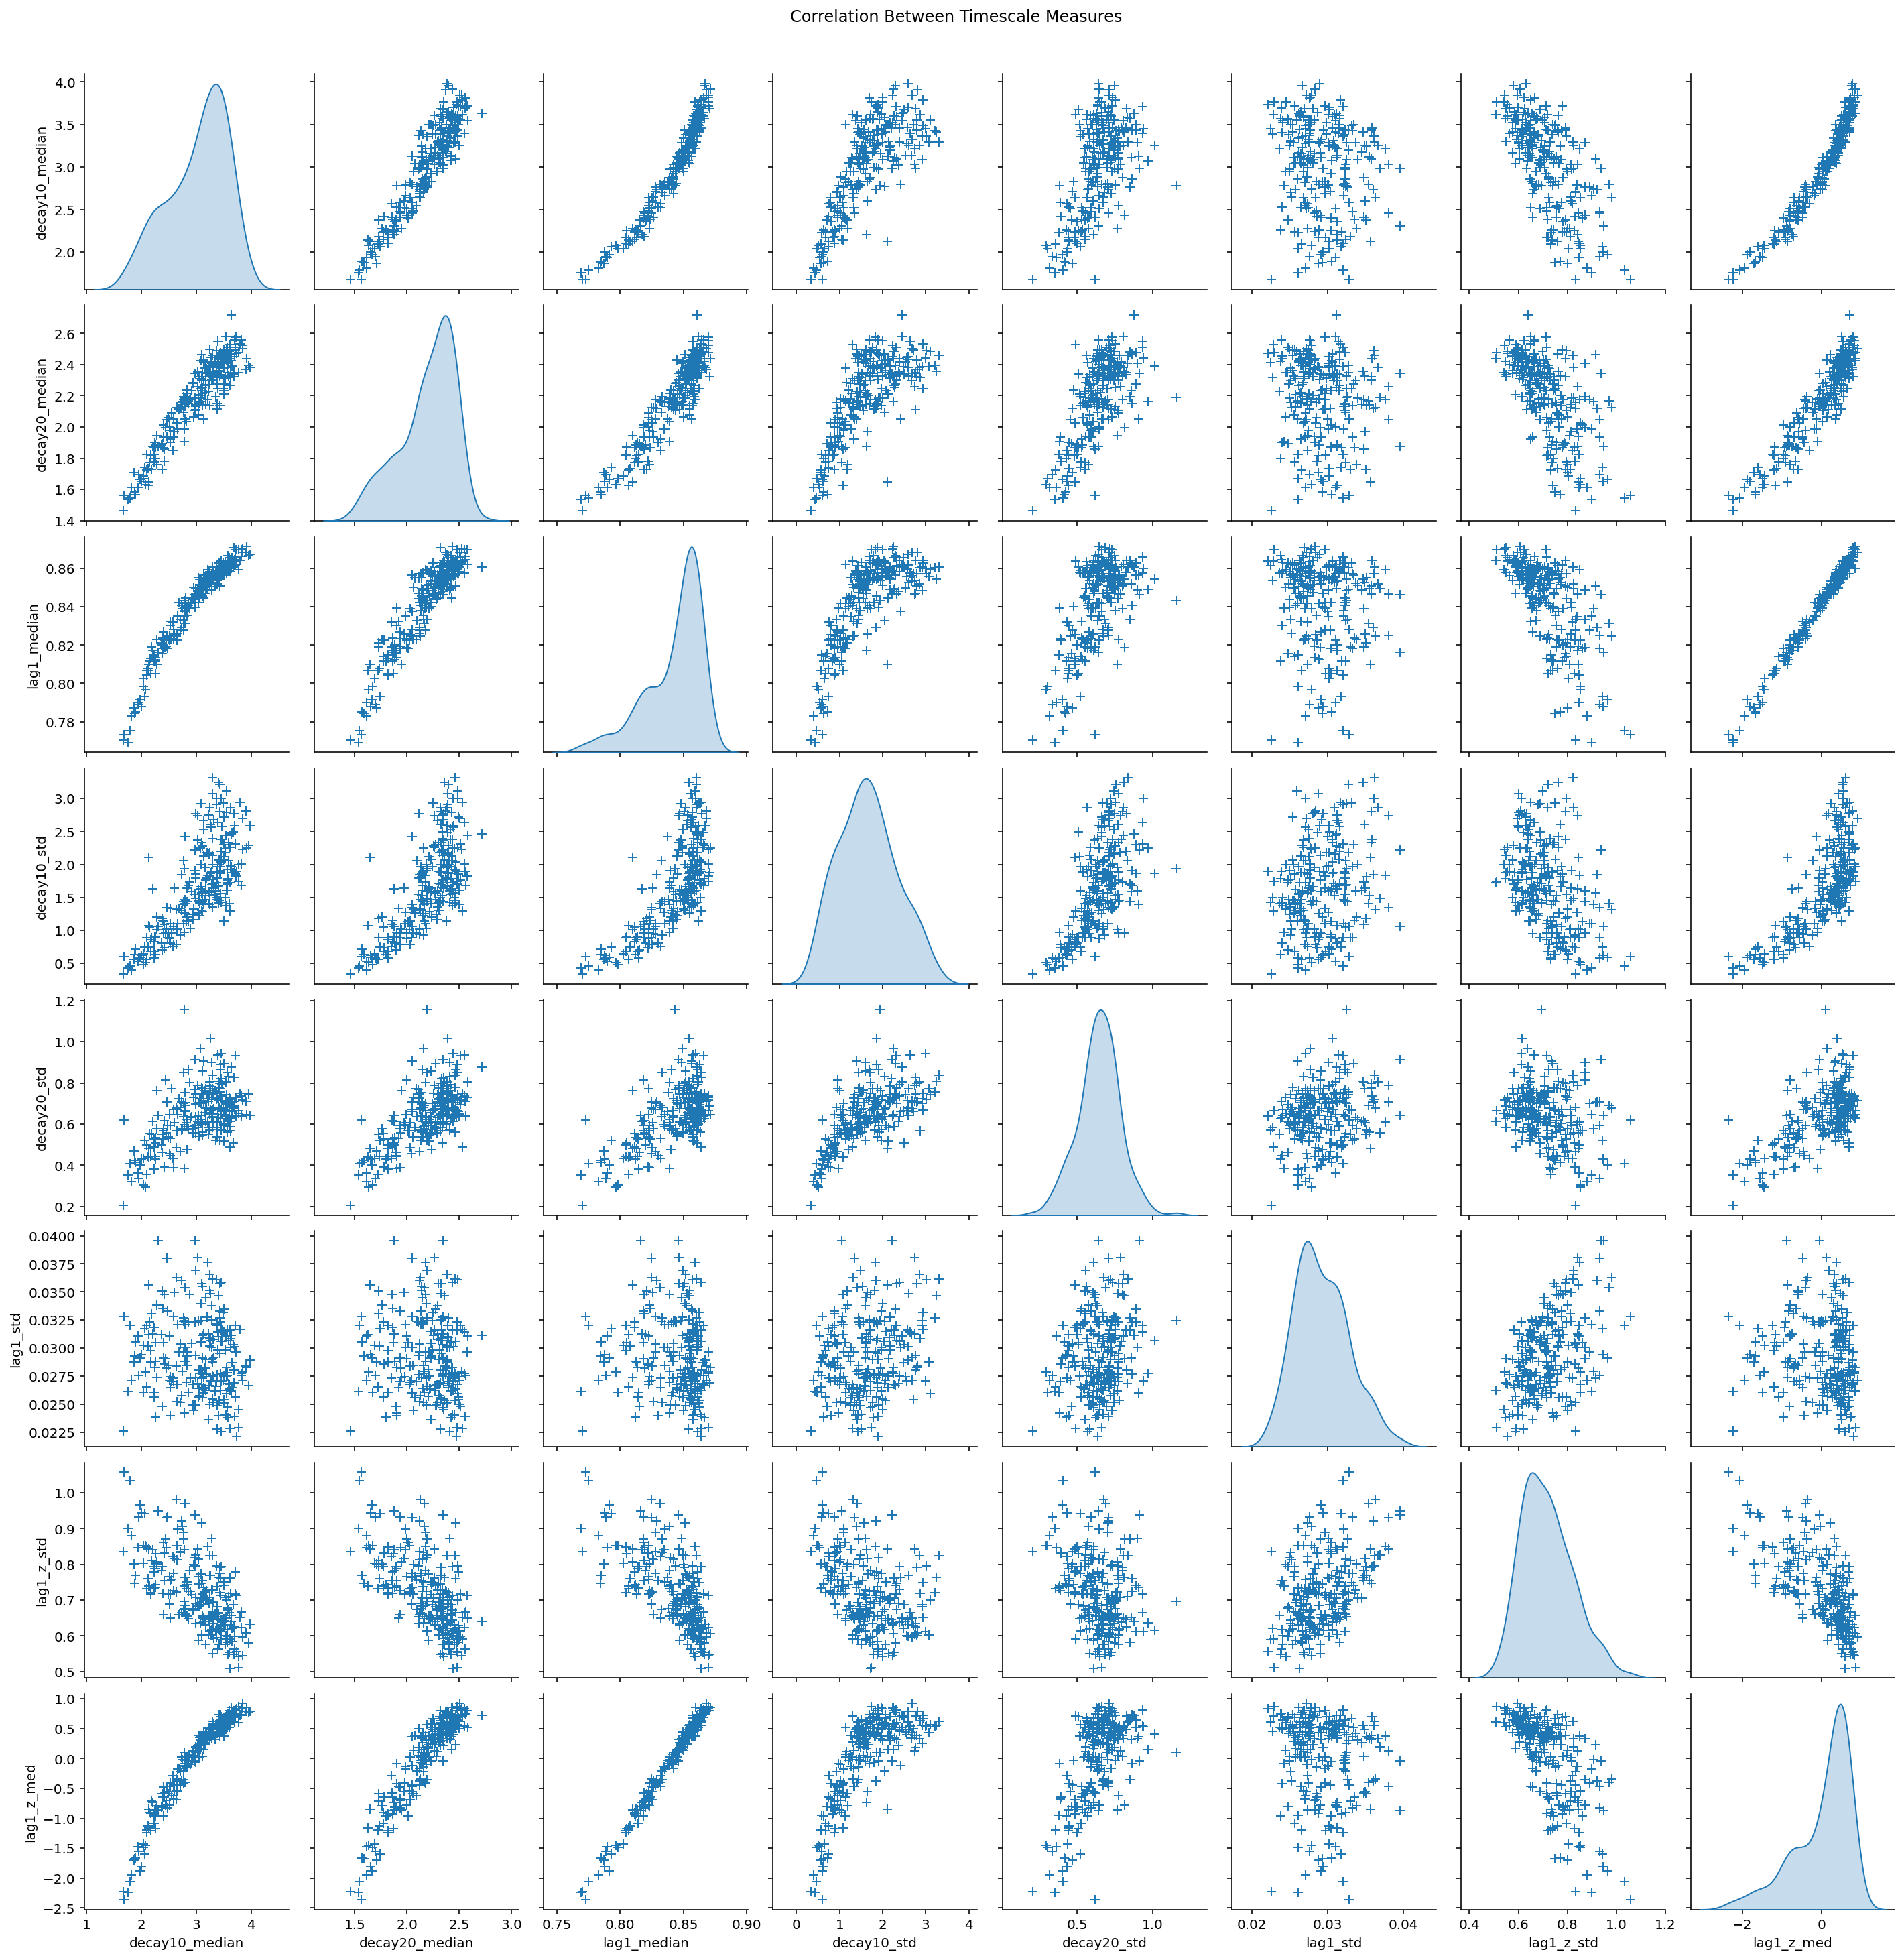

In [34]:
g = sns.pairplot(ts_df, diag_kind='kde', markers='+',
             plot_kws=dict(s=50, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True))
plt.suptitle("Correlation Between Timescale Measures", y=1.02)

In [36]:
ts_df.to_csv('../../../results/timescales/NKI-1400_HY_CompCor_BNA_timescale_df.csv')